## II. Error propagation:

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from sympy import *

In [2]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

In [3]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

### 2.1 (8 points) Let x = 1.043 pm 0.014 and y = 0.07 pm 0.23, and let z1 = xye**(-y) and z2 = (y+1)**3 / (x-1).

Which of the (uncorrelated) variables x and y contributes most to the uncertainty on z1?

In [4]:
x = 1.043
ex = 0.014
y = 0.07
ey = 0.23

In [5]:
# Define variables:
Z1, X, Y = symbols('z1, x, y')
dZ1_X, dZ1_Y, dX, dY = symbols('sigma_z1_x, sigma_z1_y, sigma_x, sigma_y')

# Define relation, and print:
Z1 = X * Y * exp(-Y)
lprint(latex(Eq(symbols('z1'), Z1)))

# Calculate uncertainty and print:
dZ1_X = Z1.diff(X) * dX
lprint(latex(Eq(symbols('sigma_z1_x'), dZ1_X)))
dZ1_Y = Z1.diff(Y) * dY
lprint(latex(Eq(symbols('sigma_z1_y'), dZ1_Y)))

# Turn expression into numerical functions 
# fZ1 = lambdify((X, Y), Z1)
fdZ1_X = lambdify((X, dX, Y), dZ1_X)
fdZ1_Y = lambdify((X, Y, dY), dZ1_Y)

# Define values and their errors
vX, vdX = x, ex
vY, vdY = y, ey

# Numerically evaluate expressions and print 
# vZ1 = fZ1(vX, vY)
vdZ1_X = fdZ1_X(vX, vdX, vY)
vdZ1_Y = fdZ1_Y(vX, vY, vdY)
# lprint(fr'z_1 = {vZ1}')
lprint(fr'\sigma_x = {vdZ1_X}')
lprint(fr'\sigma_y = {vdZ1_Y}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

What are the uncertainties of z1 and z2, if x and y are correlated with rho = 0.4?

In [6]:
rho_xy = 0.4

In [7]:
# Define variables:
Z1, X, Y = symbols('z1, x, y')
dZ1, dX, dY, rho = symbols('sigma_z1, sigma_x, sigma_y, rho_x_y')

# Define relation, and print:
Z1 = X * Y * exp(-Y)
lprint(latex(Eq(symbols('z1'), Z1)))

# Calculate uncertainty and print:
dZ1 = sqrt((Z1.diff(X) * dX)**2 + (Z1.diff(Y) * dY)**2 + 2 * Z1.diff(X) * Z1.diff(Y) * rho * dX * dY)
lprint(latex(Eq(symbols('sigma_z1'), dZ1)))

# Turn expression into numerical functions 
fdZ1 = lambdify((X, dX, Y, dY, rho), dZ1)

# Define values and their errors
vX, vdX = x, ex
vY, vdY = y, ey
vrho = rho_xy

# Numerically evaluate expressions and print 
vdZ1 = fdZ1(vX, vdX, vY, vdY, vrho)
lprint(fr'\sigma_1 = {vdZ1}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
# Define variables:
Z2, X, Y = symbols('z2, x, y')
dZ2, dX, dY, rho = symbols('sigma_z2, sigma_x, sigma_y, rho_x_y')

# Define relation, and print:
Z2 = (Y+1)**3 / (X-1)
lprint(latex(Eq(symbols('z2'), Z2)))

# Calculate uncertainty and print:
dZ2 = sqrt((Z2.diff(X) * dX)**2 + (Z2.diff(Y) * dY)**2 + 2 * Z2.diff(X) * Z2.diff(Y) * rho * dX * dY)
lprint(latex(Eq(symbols('sigma_z2'), dZ2)))

# Turn expression into numerical functions 
fdZ2 = lambdify((X, dX, Y, dY, rho), dZ2)

# Define values and their errors
vX, vdX = x, ex
vY, vdY = y, ey
vrho = rho_xy

# Numerically evaluate expressions and print 
vdZ2 = fdZ2(vX, vdX, vY, vdY, vrho)
lprint(fr'\sigma_2 = {vdZ2}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Plot z1 in [-2; 2] against z2 in [-10; 90]. In this range, what is the z1 vs. z2 correlation?

In [9]:
samples = 1000

x = 1.043 
y = 0.07
xsigma = 0.014
ysigma = 0.23

# Generate random numbers from a gaussian distribution with known mean and sigma
xs = stats.norm.rvs(x, xsigma, size = samples)
ys = stats.norm.rvs(y, ysigma, size = samples)

def z1(x,y):
    return x*y*np.exp(-y)
def z2(x,y):
    return (y+1)**3/(x-1)
z1s = z1(xs, ys)
z2s = z2(xs, ys)

[[1.         0.74714801]
 [0.74714801 1.        ]]
0.7332140186223961 +- 0.0013817051402984278


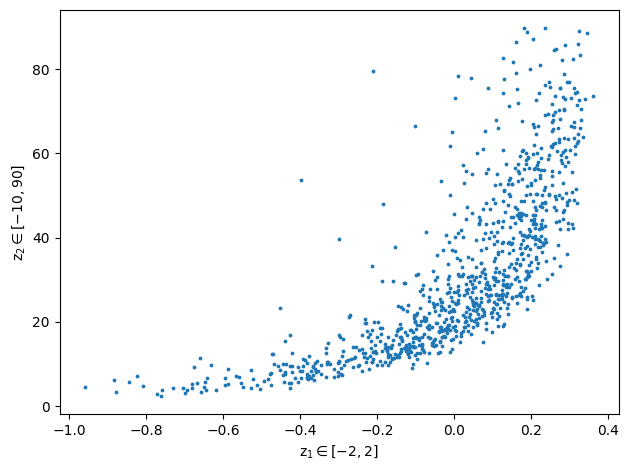

In [10]:
# Only get samples wihtin the bounds
mask = (z1s > -2)  *\
       (z1s < 2)   *\
       (z2s > -10) *\
       (z2s < 90)

# Plot z2 vs z1
plt.scatter(z1s[mask], z2s[mask], s= 3)
plt.xlabel('z$_{1}\in[-2,2]$')
plt.ylabel('z$_{2}\in[-10,90]$')
plt.tight_layout()
plt.savefig('z1_vs_z2.png', dpi=150)
print(np.corrcoef(z1s[mask], z2s[mask]))

# Only necessary if uncertainty on the correlation is wanted
runs = 100
corr = np.zeros(runs)
for i in range(runs):
    xs = stats.norm.rvs(x, xsigma, size = samples)
    ys = stats.norm.rvs(y, ysigma, size = samples)

    z1s = z1(xs, ys)
    z2s = z2(xs, ys)

    mask = (z1s > -2)  *\
           (z1s < 2)   *\
           (z2s > -10) *\
           (z2s < 90)
    
    corr[i] = np.corrcoef(z1s[mask], z2s[mask])[0,1]

print(np.mean(corr), '+-', np.std(corr, ddof=1)/np.sqrt(runs))

In [11]:
def z1_func(x, y):
    return x * y * np.exp**(-y)

def z2_func(x, y):
    return (y + 1)**3 / (x - 1)

### 2.2 (7 points) In a (Cavendish) experiment, you have made five measurements of Earth's density rho:

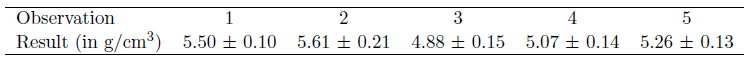

In [12]:
rho_array = np.array([5.50, 5.61, 4.88, 5.07, 5.26])
sigma_rho_array = np.array([0.10, 0.21, 0.15, 0.14, 0.13])

What is the combined result and uncertainty of these five measurements?

In [13]:
def get_mean(x):
    mu = np.sum(x) / len(x)
    std = np.sqrt((1 / (len(x) - 1)) * np.sum((x - mu)**2))
    return mu, std

def get_weigthed_mean(x, ex):
    mu_w = np.sum(x / ex**2) / np.sum(1 / ex**2)
    sigma_wmean = np.sqrt(1 / np.sum(1 / ex**2))
    return mu_w, sigma_wmean

In [14]:
rho_wmean, sigma_wmean = get_weigthed_mean(rho_array, sigma_rho_array)

print('Density of Earth:', rho_wmean, '+-', sigma_wmean)

Density of Earth: 5.279305828390056 +- 0.06005034708204228


Are your measurements consistent with each other? If not, what is then your best estimate?

In [15]:
# går ud fra at man måler det samme
# hvad er sansyndligheden for at variationen er tilfældig?

In [16]:
def consistent(mu_array, sigma_array):
    D_list = []
    sigma_D_list = []
    index_list = []
    prop_list = []

    # Define variables:
    x, y, D = symbols('x, y, D')
    dx, dy, dD = symbols('sigma_x, sigma_y, sigma_D')

    # Define relation:
    D = x - y

    # Calculate uncertainty:
    dD = sqrt((D.diff(x) * dx)**2 + (D.diff(y) * dy)**2)

    # Turn expression into numerical functions 
    # lambdify transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast
    fD = lambdify((x,y),D)
    fdD = lambdify((x,dx,y,dy),dD)

    for i, mu_i in enumerate(mu_array):
        for j, mu_j in enumerate(mu_array):
            if j > i:
                index_list.append([i+1,j+1])

                # Define values and their errors
                vx, vdx = mu_i,sigma_array[i]
                vy, vdy = mu_j,sigma_array[j]
            
                # Numerically evaluate expressions and print 
                vD = np.abs(fD(vx,vy))
                vdD = fdD(vx,vdx,vy,vdy)

                D_list.append(vD)
                sigma_D_list.append(vdD)

                prop = 2 * stats.norm.cdf(-vD, 0, vdD)
                prop_list.append(prop)

    return D_list, sigma_D_list, index_list, prop_list

In [17]:
dist, sigma_dist, index_list, prop_list = consistent(rho_array, sigma_rho_array)

for i in range(len(prop_list)):
    print(index_list[i], prop_list[i])

[1, 2] 0.636265305181146
[1, 3] 0.0005835627387778286
[1, 4] 0.012443040766606805
[1, 5] 0.14338371427172408
[2, 3] 0.00467385767994753
[2, 4] 0.03239051203104419
[2, 5] 0.15645118504198452
[3, 4] 0.3544442446165508
[3, 5] 0.0555674896649096
[4, 5] 0.31997685200883286


In [18]:
get_weigthed_mean(np.array([rho_array[0],rho_array[1],rho_array[4]]), np.array([sigma_rho_array[0],sigma_rho_array[1],sigma_rho_array[4]]))

(5.435622634270156, 0.07415604000950009)

In [19]:
get_weigthed_mean(np.array([rho_array[2],rho_array[3],rho_array[4]]), np.array([sigma_rho_array[2],sigma_rho_array[3],sigma_rho_array[4]]))

(5.088095081085303, 0.08041629575419003)

The precise value is 5.514 g/cm3. How consistent is you measurement with this number?

In [20]:
def consistent_precise(mu_array, sigma_array, mu_precise, sigma_precise):
    D_list = []
    sigma_D_list = []
    index_list = []
    prop_list = []

    # Define variables:
    x, y, D = symbols('x, y, D')
    dx, dy, dD = symbols('sigma_x, sigma_y, sigma_D')

    # Define relation:
    D = x - y

    # Calculate uncertainty:
    dD = sqrt((D.diff(x) * dx)**2 + (D.diff(y) * dy)**2)

    # Turn expression into numerical functions 
    # lambdify transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast
    fD = lambdify((x,y),D)
    fdD = lambdify((x,dx,y,dy),dD)

    for i, mu_i in enumerate(mu_array):
        index_list.append([i+1])

        # Define values and their errors
        vx, vdx = mu_i,sigma_array[i]
        vy, vdy = mu_precise,sigma_precise
            
        # Numerically evaluate expressions and print 
        vD = np.abs(fD(vx,vy))
        vdD = fdD(vx,vdx,vy,vdy)

        D_list.append(vD)
        sigma_D_list.append(vdD)

        prop = 2 * stats.norm.cdf(-vD, 0, vdD)
        prop_list.append(prop)

    return D_list, sigma_D_list, index_list, prop_list

In [21]:
dist, sigma_dist, index_list, prop_list = consistent_precise(rho_array, sigma_rho_array, 5.514, 0)

for i in range(len(prop_list)):
    print(index_list[i], prop_list[i])

[1] 0.8886599903881853
[2] 0.6475683676310552
[3] 2.3717861346754454e-05
[4] 0.0015169116773216533
[5] 0.050719414139661335


### 2.3 (7 points) An ellipse E has semi-major axis a = 1.04 pm 0.27 and eccentricity e = 0.71 pm 0.12.

In [22]:
axis = 1.04
e_axis = 0.27
eccentricity = 0.71
e_eccentricity = 0.12

The area A of an ellipse is generally A = pi * a^2 * sqrt(1 - e^2). What is the area of the ellipse E?

In [23]:
# Define variables:
A, a, e = symbols('A, a, e')
dA, da, de = symbols('sigma_A, sigma_a, sigma_e')

# Define relation, and print:
A = pi * a**2 * sqrt(1 - e**2)
lprint(latex(Eq(symbols('A'), A)))

# Calculate uncertainty and print:
dA = sqrt((A.diff(a) * da)**2 + (A.diff(e) * de)**2)
lprint(latex(Eq(symbols('sigma_A'), dA)))

# Turn expression into numerical functions 
fA = lambdify((a, e), A)
fdA = lambdify((a, da, e, de), dA)

# Define values and their errors
va, vda = axis, e_axis
ve, vde = eccentricity, e_eccentricity

# Numerically evaluate expressions and print
vA = fA(va, ve)
vdA = fdA(va, vda, ve, vde)
lprint(fr'A = ({vA:.1f} \pm {vdA:.1f})\,\mathrm{{m}}^{2}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The circumference C has no formula but can be bounded as 4 * a * sqrt(2 - e^2) < C < pi * a* sqrt(4 - 2*e^2) What value and uncertainty for C would you give?

In [24]:
C_array = np.zeros(2)
sigma_C_array = np.zeros(2)

In [25]:
# Define variables:
c, a, e = symbols('c, a, e')
dc, da, de = symbols('sigma_c, sigma_a, sigma_e')

# Define values and their errors
va, vda = axis, e_axis
ve, vde = eccentricity, e_eccentricity


for i in range(len(C_array)):
    if i % 2 == 0:
        # Define relation
        c = 4 * a**2 * sqrt(2 - e**2)

        # Calculate uncertainty
        dc = sqrt((c.diff(a) * da)**2 + (c.diff(e) * de)**2)

        # Turn expression into numerical functions 
        fc = lambdify((a, e), c)
        fdc = lambdify((a, da, e, de), dc)
        
        # Numerically evaluate expressions
        C_array[i] = fc(va, ve)
        sigma_C_array[i] = fdc(va, vda, ve, vde)
    
    if i % 2 != 0:
        # Define relation
        c = pi * a**2 * sqrt(4 - 2*e**2)

        # Calculate uncertainty
        dc = sqrt((c.diff(a) * da)**2 + (c.diff(e) * de)**2)

        # Turn expression into numerical functions 
        fc = lambdify((a, e), c)
        fdc = lambdify((a, da, e, de), dc)

        # Numerically evaluate expressions
        C_array[i] = fc(va, ve)
        sigma_C_array[i] = fdc(va, vda, ve, vde)

In [26]:
wC, sigma_wC = get_weigthed_mean(C_array, sigma_C_array)

print('Circumference:', wC, '+-', sigma_wC)

Circumference: 5.553779786139386 +- 2.054130301663395


In [27]:
C, std_C = get_mean(C_array)

print('Circumference:', C, '+-', std_C)

Circumference: 5.584428460668343 +- 0.41427803867098095
